In [1]:
import os

import xarray as xr
import matplotlib.pyplot as plt
import ncar_jobqueue
from numpy.polynomial import polynomial as P

import data_catalog
import tseries_mod
from utils import time_year_plus_frac

In [2]:
data_catalog.set_catalog('experiments')
regions = ['Global']

active catalog: experiments


In [3]:
clobber = os.environ['CLOBBER'] == 'True' if 'CLOBBER' in os.environ else False
cluster = ncar_jobqueue.NCARCluster() if clobber else None

In [4]:
def polyfit_summary(t, y):
    pf0, stats0 = P.polyfit(t, y, 0, full=True)
    pf1, stats1 = P.polyfit(t, y, 1, full=True)
    mean = pf0[0]
    slope = pf1[1]
    var_expl = 1.0 - stats1[0][0] / stats0[0][0]
    print(f'    mean={mean}, slope={slope}, variance explained={var_expl}')

def Cinv_ocn_drift_summary(experiment, varnames = ['DIC_vertint', 'DOC_vertint', 'DOCr_vertint']):
    ds_ann = tseries_mod.tseries_get_vars(varnames, 'ocn', experiment, cluster_in=cluster, freq='ann')
    for region in regions:
        y_sum = None
        for varname in varnames:
            title = ' '.join([experiment, varname, region])
            tseries_mod.tseries_plot_1ds(ds_ann, [varname], title=title, region_val=region)
            t = time_year_plus_frac(ds_ann, 'time')
            y = ds_ann[varname].sel(region=region).values
            print(f'summary for {varname}')
            polyfit_summary(t, y)
            y_sum = y if y_sum is None else y_sum + y
        # assume t from last varname is applicable
        print(f'summary for sum over vars')
        polyfit_summary(t, y_sum)

summary for DIC_vertint
    mean=37088.48308593749, slope=-0.04460378347237388, variance explained=0.9928529388240925
summary for DOC_vertint
    mean=23.451404754320784, slope=5.730322085401132e-05, variance explained=0.055985113789969954
summary for DOCr_vertint
    mean=356.48924926757803, slope=-0.0004627818250722063, variance explained=0.9982220624237258
summary for sum over vars
    mean=37468.42375651043, slope=-0.045009062670954905, variance explained=0.9925572046865448


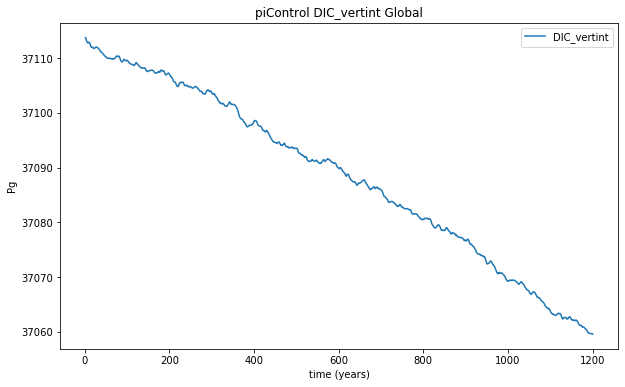

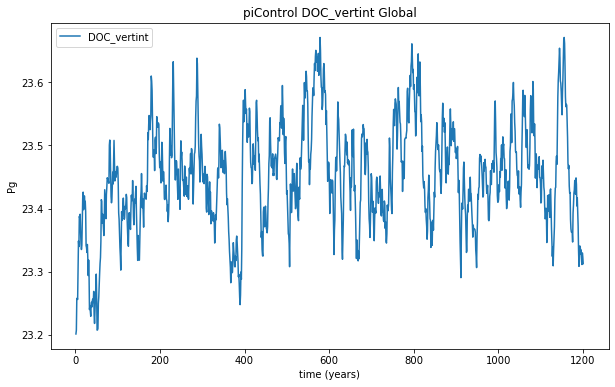

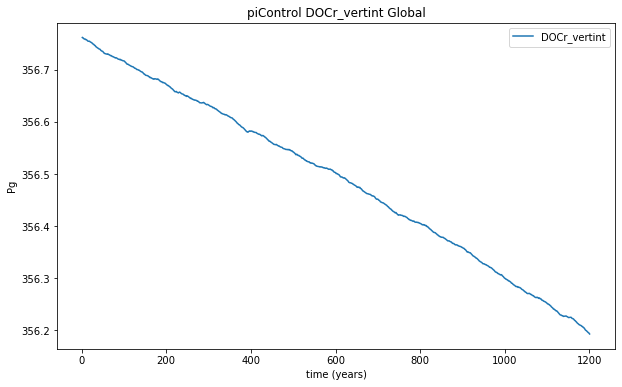

In [5]:
Cinv_ocn_drift_summary(experiment='piControl')

summary for DIC_vertint
    mean=37097.54743079911, slope=-0.05682753648473647, variance explained=0.9945619692289713
summary for DOC_vertint
    mean=23.343982073491468, slope=0.0001584263124853435, variance explained=0.05349953550266484
summary for DOCr_vertint
    mean=356.6557471021144, slope=-0.0004122493358059361, variance explained=0.9964918139724253
summary for sum over vars
    mean=37477.54721161072, slope=-0.05708222696525375, variance explained=0.9938092758079679


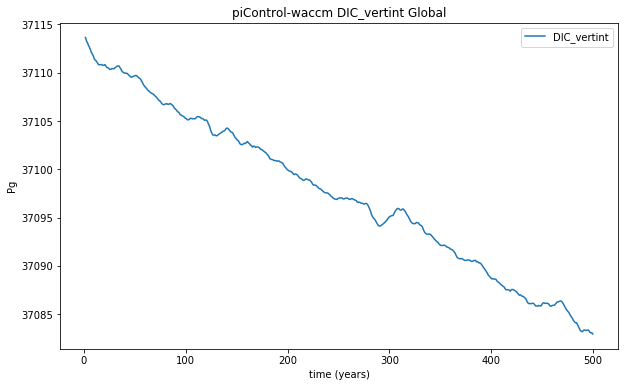

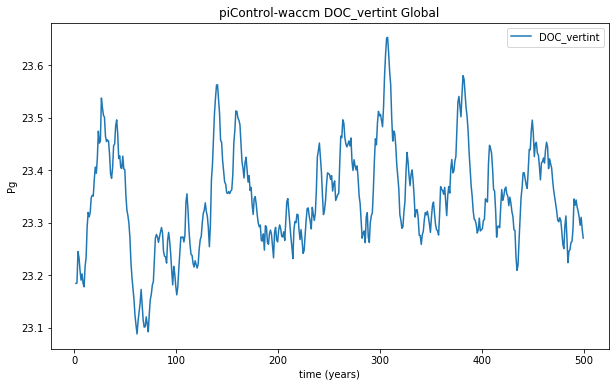

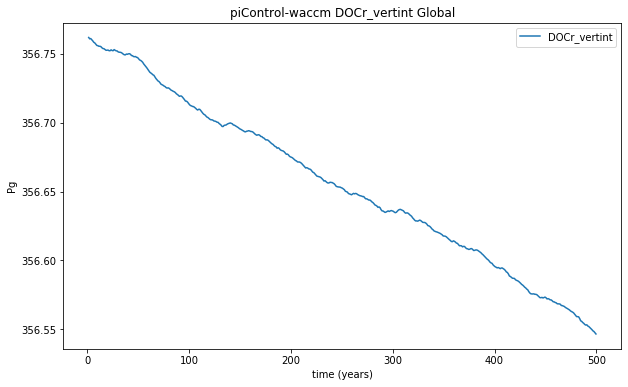

In [6]:
Cinv_ocn_drift_summary(experiment='piControl-waccm')

summary for DIC_vertint
    mean=37091.693652343754, slope=-0.03406733492939386, variance explained=0.8173389043360719
summary for DOC_vertint
    mean=23.39455699920655, slope=0.00030610089148659105, variance explained=0.015609439548003867
summary for DOCr_vertint
    mean=356.5190181732179, slope=-0.0005506344756211908, variance explained=0.9933743368788771
summary for sum over vars
    mean=37471.607421875015, slope=-0.03431328400172209, variance explained=0.78826819788705


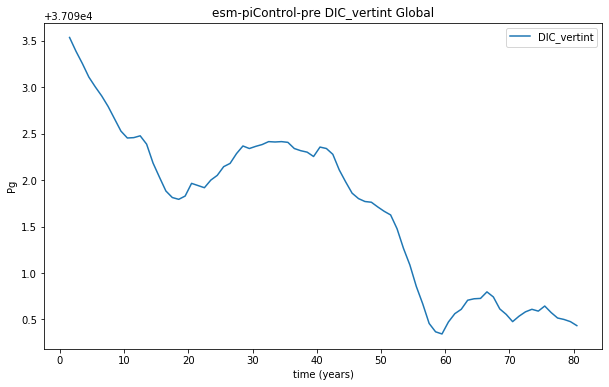

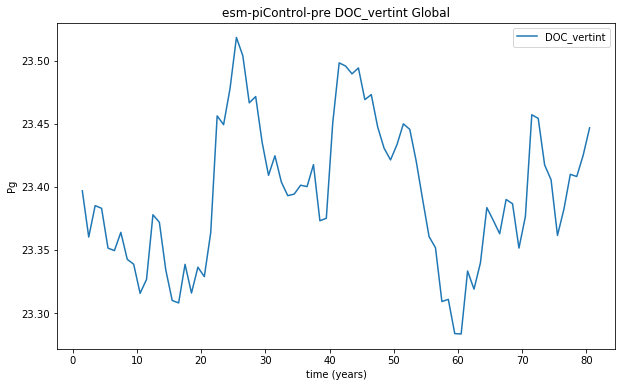

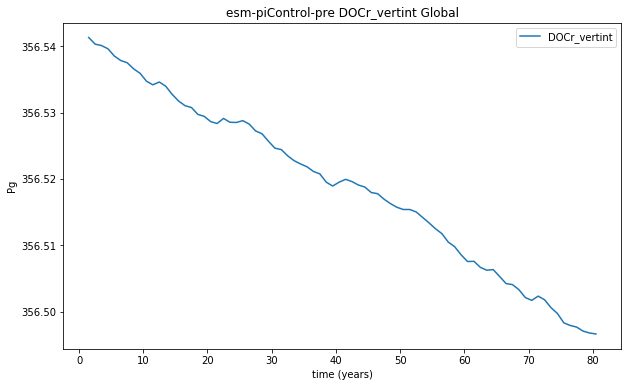

In [7]:
Cinv_ocn_drift_summary(experiment='esm-piControl-pre')

summary for DIC_vertint
    mean=37087.3471640625, slope=-0.015232741122625905, variance explained=0.8424544435508112
summary for DOC_vertint
    mean=23.46527574157715, slope=-4.646097805879393e-05, variance explained=0.005266320095676291
summary for DOCr_vertint
    mean=356.3767658691405, slope=-0.0004794069773074161, variance explained=0.9930104110513336
summary for sum over vars
    mean=37467.1892578125, slope=-0.015758739976768105, variance explained=0.8429292854787326


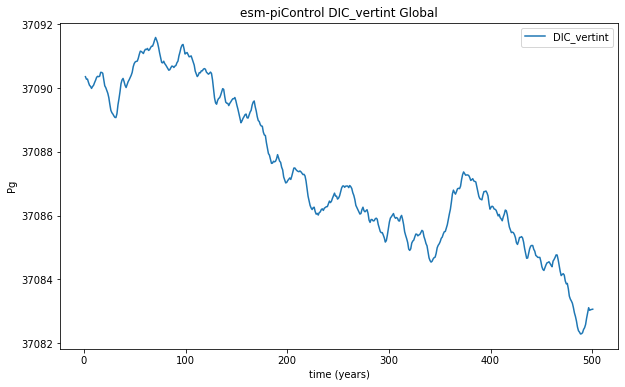

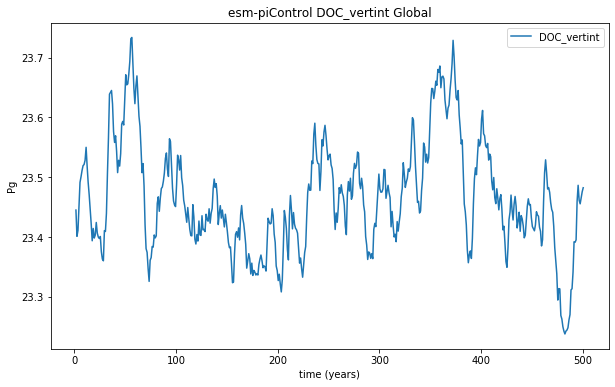

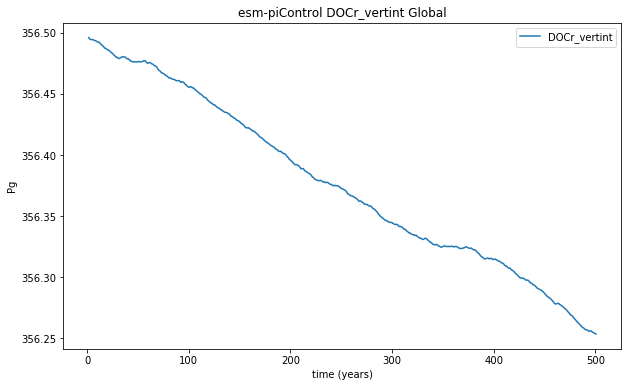

In [8]:
Cinv_ocn_drift_summary(experiment='esm-piControl')

summary for DIC_vertint
    mean=36427.722781250006, slope=-0.022988064130080647, variance explained=0.9804493107562858
summary for DOC_vertint
    mean=9.592662517547605, slope=-6.047383770845179e-05, variance explained=0.10122964692302261
summary for sum over vars
    mean=36437.3154453125, slope=-0.023048539315723014, variance explained=0.9809226079480236


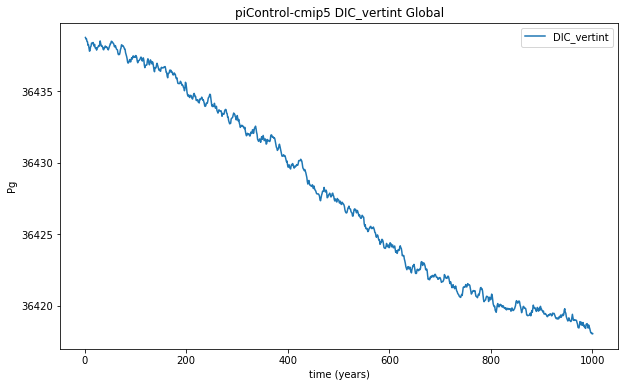

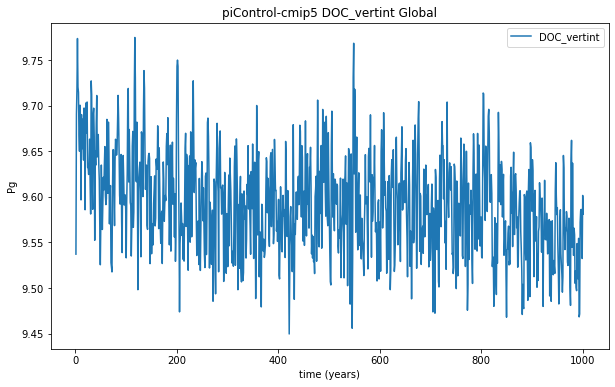

In [9]:
Cinv_ocn_drift_summary(experiment='piControl-cmip5', varnames = ['DIC_vertint', 'DOC_vertint'])

summary for DIC_vertint
    mean=36426.79095312503, slope=-0.01788618289480127, variance explained=0.9304778344328745
summary for DOC_vertint
    mean=9.589965471267705, slope=-8.071541451830654e-05, variance explained=0.18916639632527255
summary for sum over vars
    mean=36436.38093359376, slope=-0.017967203765017523, variance explained=0.9306804880170257


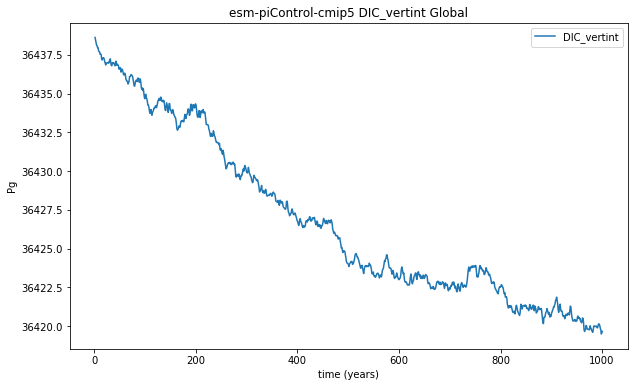

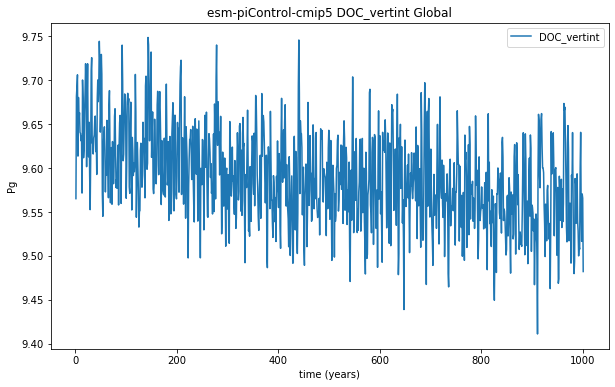

In [10]:
Cinv_ocn_drift_summary(experiment='esm-piControl-cmip5', varnames = ['DIC_vertint', 'DOC_vertint'])

In [11]:
if clobber:
    cluster.close()